## Import Libraries


In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRegressor
warnings.filterwarnings(action="ignore")


## Read Data

In [2]:
df = pd .read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')


## Display First And Random 5 Rows

In [3]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1
89,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6,300,16.6,372.75,11.22,22.2
244,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7,330,19.1,372.49,12.50,17.6
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1


## make some statistical view

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Show Data Types Of Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Show Null,Nan And Duplication Values In Data

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df[df.isnull()==True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dropna(inplace=True)

In [10]:
print(f"The sum of null values is      : {df.isnull().sum().sum()}")

The sum of null values is      : 0


In [11]:
print(f"The sum of NAN values is      : {df.isna().sum().sum()}")

The sum of NAN values is      : 0


In [12]:
print(f"The sum of Duplicated values is      : {df.duplicated().sum().sum()}")

The sum of Duplicated values is      : 0


## Display Number Of Rows And Columns

In [13]:
print(f"DataFrame shape       : {df.shape}")


DataFrame shape       : (394, 14)


In [14]:
len(df.columns)

14

## Make Some Visualization

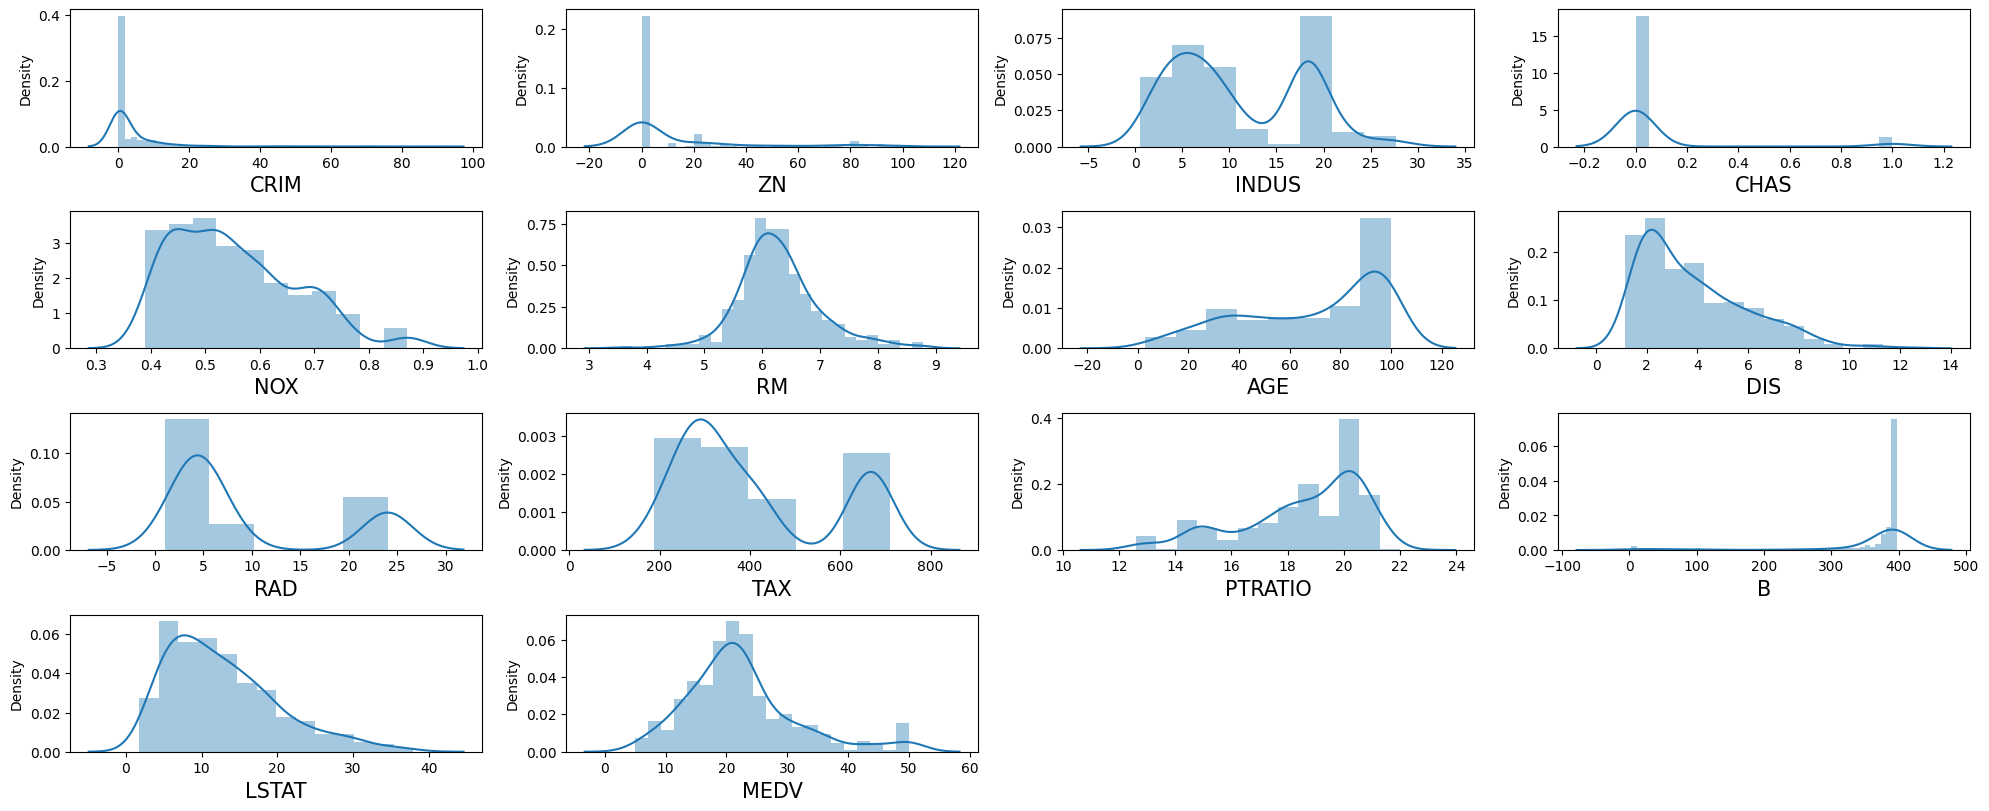

In [15]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

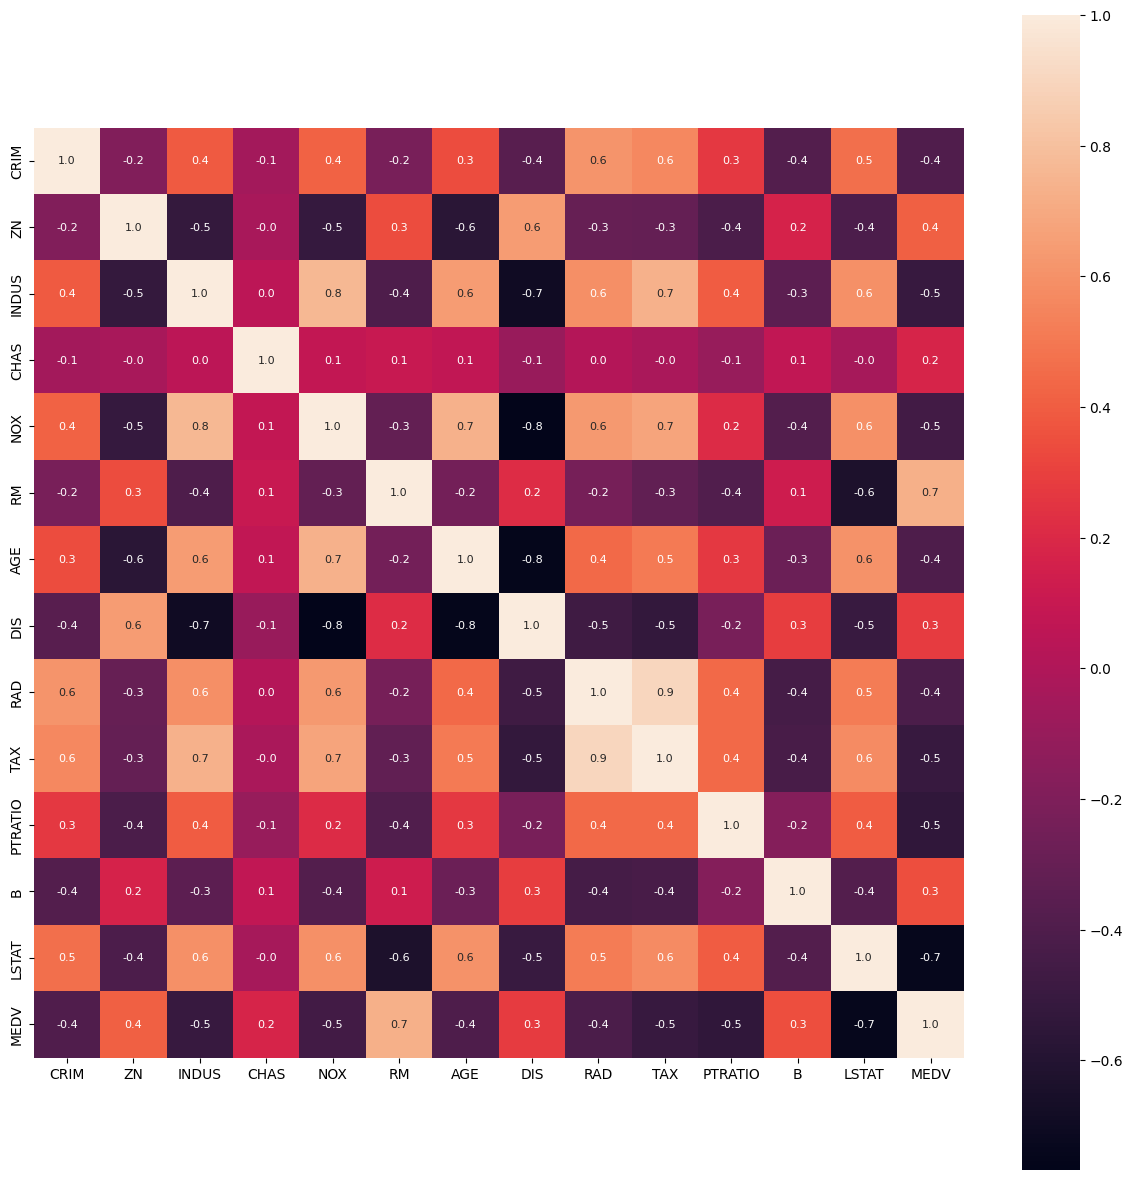

In [16]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':8})

## Splitting The Data

In [17]:
X=df.drop(columns=['MEDV'],axis=1)
y=df.MEDV

In [18]:
print(f"X shape       : {X.shape}")
print(f"Y shape       : {y.shape}")

X shape       : (394, 13)
Y shape       : (394,)


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
print(f"X shape       : {X.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")

X shape       : (394, 13)
X_train shape : (275, 13)
X_test shape  : (119, 13)


## Train The Model

In [21]:
model=XGBRegressor()

In [22]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [23]:
model_train=model.predict(X_train)  

In [24]:
 score1=metrics.r2_score(y_train,model_train)
 score2=metrics.mean_absolute_error(y_train,model_train)

In [25]:
print(f"Score of R2 for testing       : {score1}")
print(f"Score of MAE for testing       : {score2}")

Score of R2 for testing       : 0.999999773564939
Score of MAE for testing       : 0.0029466729597612067


In [26]:
model_test=model.predict(X_test)  

In [27]:
 score1=metrics.r2_score(y_test,model_test)
 score2=metrics.mean_absolute_error(y_test,model_test)

In [28]:
print(f"Score of R2 for testing       : {score1}")
print(f"Score of MAE for testing       : {score2}")

Score of R2 for testing       : 0.7838392024277021
Score of MAE for testing       : 2.5432272149735136


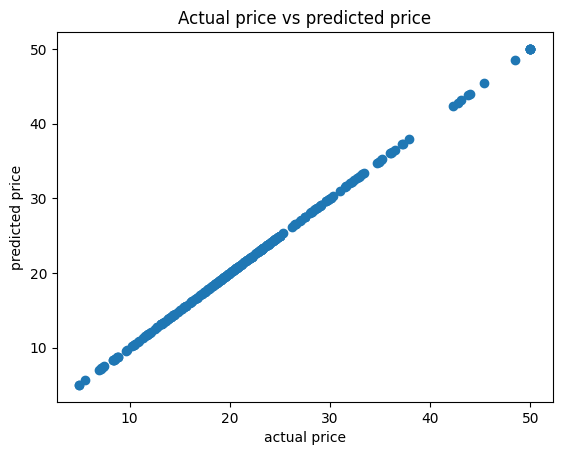

In [29]:
plt.scatter(y_train,model_train)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

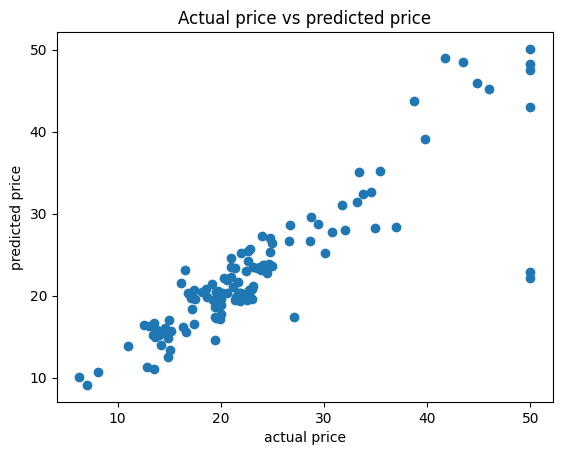

In [30]:
plt.scatter(y_test,model_test)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

# Thank You

# Made By : Ali Osama